In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import date, datetime

In [4]:
data = np.array(pd.read_csv('../data/full_data.csv'))
data = data[data[:, 9] == 'DEHB001'][:,:9]

In [5]:
time, x_raw, y_raw = data[:, 0], np.delete(data, [0, 5], axis=1), data[:, [5]]
# Time => Date,
# X => PM10,NO2,NOx,NO,SO2,CO,PM2.5
# Y => O3

In [6]:
x_raw[0]

array([76.0, 11.0, 13.0, 1.0, 9.0, 0.1, nan], dtype=object)

In [7]:
scaler_x = MinMaxScaler()
x = scaler_x.fit_transform(x_raw)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y_raw)[:, 0]

/usr/local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


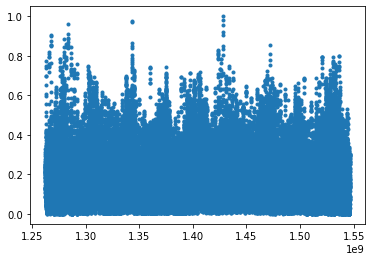

In [204]:
plt.plot(time, y, '.')
plt.show()

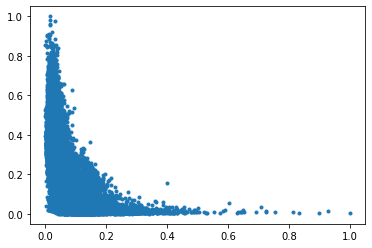

In [205]:
plt.plot(x[:, 2], y, '.')

In [206]:
start_2001 = int(date(2010, 1, 1).strftime('%s'))
end_2001 = int(date(2010, 12, 31).strftime('%s'))
mask_2001 = np.logical_and(time > start_2001, time < end_2001)
time_2001, x_2001, y_2001 = time[mask_2001], x[mask_2001], y[mask_2001]

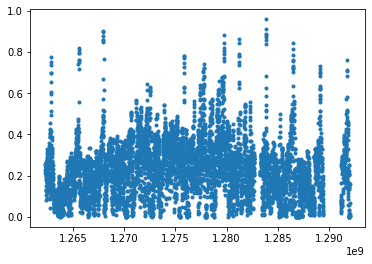

In [207]:
plt.plot(time_2001, y_2001, '.')

In [208]:
time_2001.shape

(7521,)

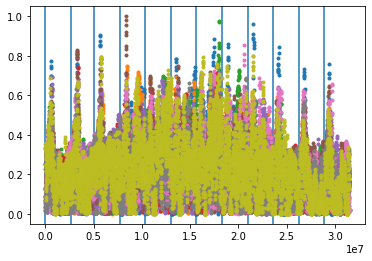

In [209]:
for i in range(1, 13):
    month_start = int(date(2010, i, 1).strftime('%s')) - int(date(2010, 1, 1).strftime('%s'))
    plt.axvline(month_start)
for year in range(2010, 2020):
    start_year = int(date(year, 1, 1).strftime('%s'))
    end_year = int(date(year, 12, 31).strftime('%s'))
    mask_year = np.logical_and(time > start_year, time < end_year)
    time_year, x_year, y_year = time[mask_year], x[mask_year], y[mask_year]
    plt.plot(time_year - start_year, y_year, '.')
#     plt.show()
plt.show()

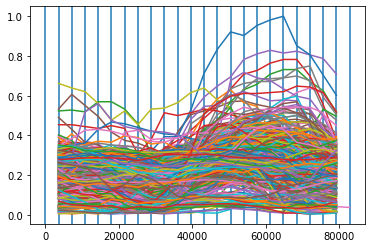

In [211]:
for i in range(0, 24):
    start_hr = int(datetime(2010, 1, 1, i).strftime('%s')) - int(datetime(2010, 1, 1, 0).strftime('%s'))
    plt.axvline(start_hr)
for year in range(5, 6):
    for month in range(1, 13):
        for day in range(1, 29):
            start_day = int(datetime(2010 + year, month, day, 0).strftime('%s'))
            end_day = int(datetime(2010 + year, month, day, 23).strftime('%s'))
            mask_day = np.logical_and(time > start_day, time < end_day)
            time_day, x_day, y_day = time[mask_day], x[mask_day], y[mask_day]
            plt.plot(time_day - start_day, y_day, '-')
plt.show()

In [ ]:
for i in range(0, 24):
    start_hr = int(datetime(2010, 1, 1, i).strftime('%s')) - int(datetime(2010, 1, 1, 0).strftime('%s'))
    plt.axvline(start_hr)
for year in range(5, 6):
    for month in range(1, 13):
        for day in range(1, 29):
            start_day = int(datetime(2010 + year, month, day, 0).strftime('%s'))
            end_day = int(datetime(2010 + year, month, day, 23).strftime('%s'))
            mask_day = np.logical_and(time > start_day, time < end_day)
            time_day, x_day, y_day = time[mask_day], x[mask_day], y[mask_day]
            plt.plot(time_day - start_day, y_day, '-')
plt.show()

In [1]:
from sklearn import tree

In [2]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X, y)